###En este Notebook revisaremos el proceso de manejo de DATOS FALTANTES.

Primero trabajeremos con un dataset pequeño y luego con un data set más grande.

In [1]:
import numpy as np
import pandas as pd

**Usaremos el mismo dataset péqueño**

Como se darán cuenta, el valor **np.nan** es una forma común de reflejar la presencia de DATOS FALTANTES.

No siempre es asi. Como vimos en la clase teórica, aveces puedne encontrar otros símbolos como: espacios en blanco, signos de interrogación, etc.

In [2]:
datos = {'alumno': ['Zutano', 'Mengano', 'Zutano','Pepe' ,'Fulanito, Cosme', 'Maria', 'Juan', 'Pablo', 'Ana'],
         'Primera prueba': [np.nan, 8.5,7,7,np.nan, 4.5, 7.5, 1.0, 8.8],
         'Segunda prueba': [10,np.nan,9.8,4,np.nan,np.nan, 2.5, np.nan, np.nan],
         'observaciones':['ninguna','libre','ninguna','ninguna','libre','oyente','ninguna','libre','oyente'],
         'DNI':[23000000, 12389100,23000000, 99999, 1001,30406011, 1230000, 86758444, 9996696]}
df = pd.DataFrame(datos)
df

,alumno,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,NaN,10.0,ninguna,23000000
1,Mengano,8.5,NaN,libre,12389100
2,Zutano,7.0,9.8,ninguna,23000000
3,Pepe,7.0,4.0,ninguna,99999
4,"Fulanito, Cosme",NaN,NaN,libre,1001
5,Maria,4.5,NaN,oyente,30406011
6,Juan,7.5,2.5,ninguna,1230000
7,Pablo,1.0,NaN,libre,86758444
8,Ana,8.8,NaN,oyente,9996696


### Eliminación de filas o columnas con DATOS FALTANTES

Eliminamos las filas que tienen NaN. Para eso usamos el método df.dropna()

In [3]:
df_2 = df.dropna()
df_2

,alumno,Primera prueba,Segunda prueba,observaciones,DNI
2,Zutano,7.0,9.8,ninguna,23000000
3,Pepe,7.0,4.0,ninguna,99999
6,Juan,7.5,2.5,ninguna,1230000


Observemos que había varias maneras de hacer esto. Por ejemplo, podríamos haber querido eliminar las columnas que tenían un NaN, en vez de las filas:

In [4]:
df_3 = df.dropna(axis=1)
df_3

,alumno,observaciones,DNI
0,Zutano,ninguna,23000000
1,Mengano,libre,12389100
2,Zutano,ninguna,23000000
3,Pepe,ninguna,99999
4,"Fulanito, Cosme",libre,1001
5,Maria,oyente,30406011
6,Juan,ninguna,1230000
7,Pablo,libre,86758444
8,Ana,oyente,9996696


### Podemos usar técnicas de imputación.

In [5]:
# Volvemos a mostrar los datos iniciales
df

,alumno,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,NaN,10.0,ninguna,23000000
1,Mengano,8.5,NaN,libre,12389100
2,Zutano,7.0,9.8,ninguna,23000000
3,Pepe,7.0,4.0,ninguna,99999
4,"Fulanito, Cosme",NaN,NaN,libre,1001
5,Maria,4.5,NaN,oyente,30406011
6,Juan,7.5,2.5,ninguna,1230000
7,Pablo,1.0,NaN,libre,86758444
8,Ana,8.8,NaN,oyente,9996696


Imputaremos por la media observable de la columna "Primera prueba" y "Segunda prueba"

In [6]:
a = df['Primera prueba']
b = df['Segunda prueba']
prom_a = a.mean()
prom_b = b.mean()

# Una forma simple es usar un diccionario para guardar la información.
#La llaves del diccionario son los nombres de las variables (columnas) y el valor asociado es el promedio
diccionario = {'Primera prueba':prom_a, 'Segunda prueba': prom_b}

# El método .fillna sirve para reemplazar los valores NaN por los que queremos.
df2 = df.fillna(diccionario)
df2

,alumno,Primera prueba,Segunda prueba,observaciones,DNI
0,Zutano,6.328571,10.000,ninguna,23000000
1,Mengano,8.500000,6.575,libre,12389100
2,Zutano,7.000000,9.800,ninguna,23000000
3,Pepe,7.000000,4.000,ninguna,99999
4,"Fulanito, Cosme",6.328571,6.575,libre,1001
5,Maria,4.500000,6.575,oyente,30406011
6,Juan,7.500000,2.500,ninguna,1230000
7,Pablo,1.000000,6.575,libre,86758444
8,Ana,8.800000,6.575,oyente,9996696


Como se habra dado cuenta, el dataframe se ve modificado segun el valor promedio de la variable respectiva. Esto puede ser útil, a veces, pero otras no.

Por ejemplo, en la variable: "Segunda prueba", existe 3 DATOS FALTANTES. Esto es el 50% de los datos. Eso puede tener una repercusión fuerte en la distribución de los datos.

##Tarea en clase:

###¿Qué tipo de gráfico nos puede mostrar la distribución de los datos?

### Haga un grafico que permita ver la distribucion de los datos de las variables: "Primera prueba" y "Segunda prueba". ¿Logra ver la influencia de la imputación?

Recuerde importar las librerias para graficar.

###!!TIENE 20 Minutos!!

.

.

.

.

.

.


.

.
.


.

.

.

.



In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

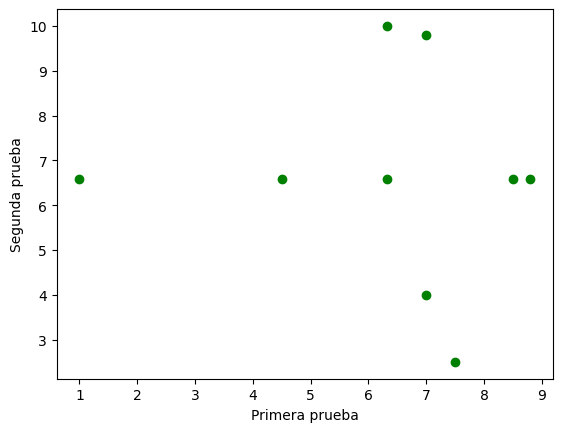

In [8]:
plt.scatter(df2['Primera prueba'], df2['Segunda prueba'], c="g", alpha=1,)
plt.xlabel("Primera prueba")
plt.ylabel("Segunda prueba")
plt.show()

In [9]:
# aca obtenemos lso indices donde hay datos.
bol = np.isnan(df['Primera prueba'])
indices = np.where(bol==False)[0]
indices

array([1, 2, 3, 5, 6, 7, 8])

In [10]:
# verificamos si solo obtenemos datos y no los MV
data_filtrada1 = df['Primera prueba'][indices]
data_filtrada1

1    8.5
2    7.0
3    7.0
5    4.5
6    7.5
7    1.0
8    8.8
Name: Primera prueba, dtype: float64

In [11]:
# hacemos lo mismo con la segunda variable
bol = np.isnan(df['Segunda prueba'])
indices = np.where(bol==False)[0]
data_filtrada2 = df['Segunda prueba'][indices]
data_filtrada2

0    10.0
2     9.8
3     4.0
6     2.5
Name: Segunda prueba, dtype: float64

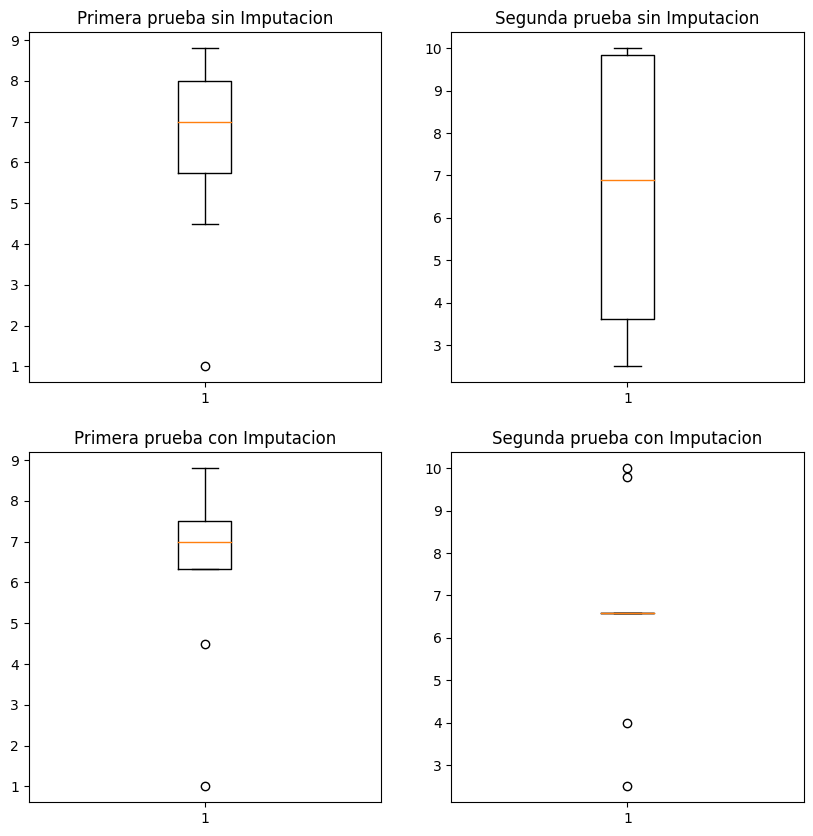

In [12]:
fig1, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].set_title('Primera prueba sin Imputacion')
axs[0,0].boxplot(data_filtrada1)
axs[0,1].set_title('Segunda prueba sin Imputacion')
axs[0,1].boxplot(data_filtrada2)
axs[1,0].set_title('Primera prueba con Imputacion')
axs[1,0].boxplot(df2['Primera prueba'])
axs[1,1].set_title('Segunda prueba con Imputacion')
axs[1,1].boxplot(df2['Segunda prueba'])

plt.show()

Grafico de cajas y un grafico de dispercion, en la segunda prueba se puede ver como deja solamente outliers